# 텍스트 수집 및 키워드 분석

## 한글 폰트 설정

* 실행 후 런타임 재시작 필요

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

%config InlineBackend.figure_format='retina'

!apt -qq -y install fonts-nanum

import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=10)
plt.rc('font', family='NanumBarunGothic')
mpl.font_manager._rebuild()

The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 22 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Selecting previously unselected package fonts-nanum.
(Reading database ... 123941 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


## 한국어 형태소 분석기 설치

* 한국어 자연어 처리 konlpy 라이브러리
* 형태소 분석기 MeCab 설치
* 설치 명령어: 
`!curl -s https://raw.githubusercontent.com/teddylee777/machine-learning/master/99-Misc/01-Colab/mecab-colab.sh | bash`

In [2]:
!curl -s https://raw.githubusercontent.com/teddylee777/machine-learning/master/99-Misc/01-Colab/mecab-colab.sh | bash

/bin/bash ../libtool --tag=CXX   --mode=compile g++ -DHAVE_CONFIG_H -I. -I.. -DDIC_VERSION=102   -DMECAB_DEFAULT_RC="\"/usr/local/etc/mecabrc\""    -O3 -Wall  -c -o iconv_utils.lo iconv_utils.cpp
libtool: compile:  g++ -DHAVE_CONFIG_H -I. -I.. -DDIC_VERSION=102 -DMECAB_DEFAULT_RC=\"/usr/local/etc/mecabrc\" -O3 -Wall -c iconv_utils.cpp  -fPIC -DPIC -o .libs/iconv_utils.o
libtool: compile:  g++ -DHAVE_CONFIG_H -I. -I.. -DDIC_VERSION=102 -DMECAB_DEFAULT_RC=\"/usr/local/etc/mecabrc\" -O3 -Wall -c iconv_utils.cpp -o iconv_utils.o >/dev/null 2>&1
/bin/bash ../libtool --tag=CXX   --mode=compile g++ -DHAVE_CONFIG_H -I. -I.. -DDIC_VERSION=102   -DMECAB_DEFAULT_RC="\"/usr/local/etc/mecabrc\""    -O3 -Wall  -c -o dictionary_rewriter.lo dictionary_rewriter.cpp
libtool: compile:  g++ -DHAVE_CONFIG_H -I. -I.. -DDIC_VERSION=102 -DMECAB_DEFAULT_RC=\"/usr/local/etc/mecabrc\" -O3 -Wall -c dictionary_rewriter.cpp  -fPIC -DPIC -o .libs/dictionary_rewriter.o
libtool: compile:  g++ -DHAVE_CONFIG_H -I. -I.. 

## 키워드 분석(Keyword Analysis)

* 핵심어(keyword)란 텍스트 자료의 중요한 내용을 압축적으로 제시하는 단어 또는 문구
* 핵심어 분석이란 불용어 제거와 어간추출 및 형태소 분석 등의 자연어 처리를 시행한 후 텍스트에서 많이 등장하는 형태소의 등장 빈도를 분석함으로써 핵심어를 추출   
* 특정 텍스트 자료에 많이 나타나는 형태소가 그 텍스트 주제를 표출할 가능성이 높다는 가정에 기초  
* 물론 빈도 분석에서 영어의 전치사나 한국어의 조사와 같이 의미를 별로 담고 있지 않은 불용어는 제외하는 것이 좋음
* 키워드 분석은 텍스트의 주제 추정, 텍스트 유사도, 검색 엔진의 검색 결과 우선 순위 측정 등 다양하게 사용될 수 있음

### 네이버 영화 리뷰 데이터

* 키워드 분석에는 네이버 영화 리뷰 데이터를 사용
* 데이터 다운로드: https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt

In [3]:
import urllib.request

raw = urllib.request.urlopen('https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt').readlines()
print(raw[:5])

[b'id\tdocument\tlabel\n', b'8112052\t\xec\x96\xb4\xeb\xa6\xb4\xeb\x95\x8c\xeb\xb3\xb4\xea\xb3\xa0 \xec\xa7\x80\xea\xb8\x88\xeb\x8b\xa4\xec\x8b\x9c\xeb\xb4\x90\xeb\x8f\x84 \xec\x9e\xac\xeb\xb0\x8c\xec\x96\xb4\xec\x9a\x94\xe3\x85\x8b\xe3\x85\x8b\t1\n', b'8132799\t\xeb\x94\x94\xec\x9e\x90\xec\x9d\xb8\xec\x9d\x84 \xeb\xb0\xb0\xec\x9a\xb0\xeb\x8a\x94 \xed\x95\x99\xec\x83\x9d\xec\x9c\xbc\xeb\xa1\x9c, \xec\x99\xb8\xea\xb5\xad\xeb\x94\x94\xec\x9e\x90\xec\x9d\xb4\xeb\x84\x88\xec\x99\x80 \xea\xb7\xb8\xeb\x93\xa4\xec\x9d\xb4 \xec\x9d\xbc\xea\xb5\xb0 \xec\xa0\x84\xed\x86\xb5\xec\x9d\x84 \xed\x86\xb5\xed\x95\xb4 \xeb\xb0\x9c\xec\xa0\x84\xed\x95\xb4\xea\xb0\x80\xeb\x8a\x94 \xeb\xac\xb8\xed\x99\x94\xec\x82\xb0\xec\x97\x85\xec\x9d\xb4 \xeb\xb6\x80\xeb\x9f\xac\xec\x9b\xa0\xeb\x8a\x94\xeb\x8d\xb0. \xec\x82\xac\xec\x8b\xa4 \xec\x9a\xb0\xeb\xa6\xac\xeb\x82\x98\xeb\x9d\xbc\xec\x97\x90\xec\x84\x9c\xeb\x8f\x84 \xea\xb7\xb8 \xec\x96\xb4\xeb\xa0\xa4\xec\x9a\xb4\xec\x8b\x9c\xec\xa0\x88\xec\x97\x90 \xeb\x81\x9d

* 데이터를 확인해보면 모두 바이트로 이루어져 있으며, 리뷰 외의 다른 데이터도 존재
* 데이터를 문자열로 변환하고 리뷰만 추출

In [4]:
raw = [x.decode() for x in raw[1:]]

reviews = []
for i in raw:
    reviews.append(i.split('\t')[1])

print(reviews[:5])

['어릴때보고 지금다시봐도 재밌어요ㅋㅋ', '디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산업이 부러웠는데. 사실 우리나라에서도 그 어려운시절에 끝까지 열정을 지킨 노라노 같은 전통이있어 저와 같은 사람들이 꿈을 꾸고 이뤄나갈 수 있다는 것에 감사합니다.', '폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.', '와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런게 진짜 영화지', '안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.']


### 형태소 분석을 이용한 명사 추출


* 형태소 분석기 Mecab으로 명사만 추출

In [5]:
from konlpy.tag import Mecab
tagger = Mecab()

reviews_nouns = []
for review in reviews:
    for noun in tagger.nouns(review):
        reviews_nouns.append(noun)

reviews_nouns[:10]

['때', '디자인', '학생', '외국', '디자이너', '그', '전통', '발전', '문화', '산업']

#### 불용어(Stopwords) 사전 만들기

* 형태소 분석을 통해 조사, 접속사 등의 제거 가능
* 하지만 한국어는 명사에서도 상당히 많은 불필요한 단어들이 포함
* 사용자가 직접 불용어 사전을 유지하면서 불필요한 단어 제거 필요
* 불용어 예: `전 난 일 걸 뭐 줄 만 건 분 개 끝 잼 이거 번 중 듯 때 게 내 말 나 수 거 점 것 후 이 애 씨 속 뿐 밋 그 급 ㄷ 데`
* 빈도가 너무 커서 분석에 방해되는 단어도 제거 필요 (예: `영화`)


In [6]:
stop_words = '영화 전 난 일 걸 뭐 줄 만 건 분 개 끝 잼 이거 번 중 듯 때 게 내 말 나 수 거 점 것 후 이 애 씨 속 뿐 밋 그 급 ㄷ 데'
stop_words = stop_words.split(' ')
print(stop_words)

['영화', '전', '난', '일', '걸', '뭐', '줄', '만', '건', '분', '개', '끝', '잼', '이거', '번', '중', '듯', '때', '게', '내', '말', '나', '수', '거', '점', '것', '후', '이', '애', '씨', '속', '뿐', '밋', '그', '급', 'ㄷ', '데']


#### 불용어를 제외하여 형태소 분석 수행

* 한글 텍스트에 대해서 형태소 분석 수행
* 분석으로 추출하는 명사 중에서 불용어에 포함되지 않은 텍스트만 추출하여 저장

In [7]:
reviews_nouns = []
for review in reviews:
    for noun in tagger.nouns(review):
        if noun not in stop_words:
            reviews_nouns.append(noun)

reviews_nouns[:10]

['디자인', '학생', '외국', '디자이너', '전통', '발전', '문화', '산업', '우리', '나라']

### 단어 빈도수 측정

* 단어 빈도수 측정에는 `collections` 라이브러리의 `Counter` 함수를 이용
* `collections` 라이브러리는 내장 라이브러리로 별도 설치가 필요없음
* `counter`를 이용하면 각 단어와 각 단어의 빈도 수를 딕셔너리로 편리하게 생성 가능

In [8]:
from collections import Counter

reviews_nouns_counter = Counter(reviews_nouns)
top_reviews_nouns = dict(reviews_nouns_counter.most_common(100))
top_reviews_nouns

{'연기': 9175,
 '최고': 8813,
 '평점': 8514,
 '스토리': 7163,
 '생각': 6943,
 '드라마': 6896,
 '사람': 6742,
 '감동': 6489,
 '배우': 5893,
 '내용': 5731,
 '감독': 5629,
 '재미': 5479,
 '시간': 5320,
 '년': 4936,
 '사랑': 4741,
 '쓰레기': 4585,
 '작품': 3985,
 '하나': 3923,
 '정도': 3656,
 '이건': 3650,
 '마지막': 3647,
 '액션': 3568,
 '기대': 3465,
 '장면': 3262,
 '이게': 3046,
 '편': 3044,
 '최악': 3019,
 '돈': 2980,
 '이야기': 2947,
 '이해': 2745,
 '명작': 2685,
 '여자': 2678,
 '이상': 2676,
 '처음': 2673,
 '한국': 2640,
 '주인공': 2553,
 '우리': 2531,
 '연출': 2376,
 '때문': 2371,
 '기억': 2364,
 '현실': 2193,
 '마음': 2128,
 '굿': 2110,
 '남자': 2078,
 '결말': 2066,
 '인생': 2060,
 '공포': 2048,
 '전개': 2035,
 '짜증': 2011,
 '소재': 1999,
 '느낌': 1950,
 '필요': 1929,
 '일본': 1878,
 '반전': 1868,
 '수준': 1864,
 '음악': 1852,
 '매력': 1832,
 '가슴': 1817,
 '인간': 1811,
 '짱': 1809,
 '아이': 1749,
 '원작': 1705,
 '눈물': 1704,
 '코미디': 1598,
 '추천': 1579,
 '자체': 1558,
 '실망': 1557,
 '대박': 1495,
 '눈': 1484,
 '몰입': 1453,
 '캐릭터': 1440,
 '나라': 1409,
 '가족': 1401,
 '건지': 1397,
 '연기력': 1387,
 '여운': 1386,
 '시리즈': 1

### 단어 빈도 시각화

In [9]:
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

In [10]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52572 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44256 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54217 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51216 missing from current font.
  font.set_

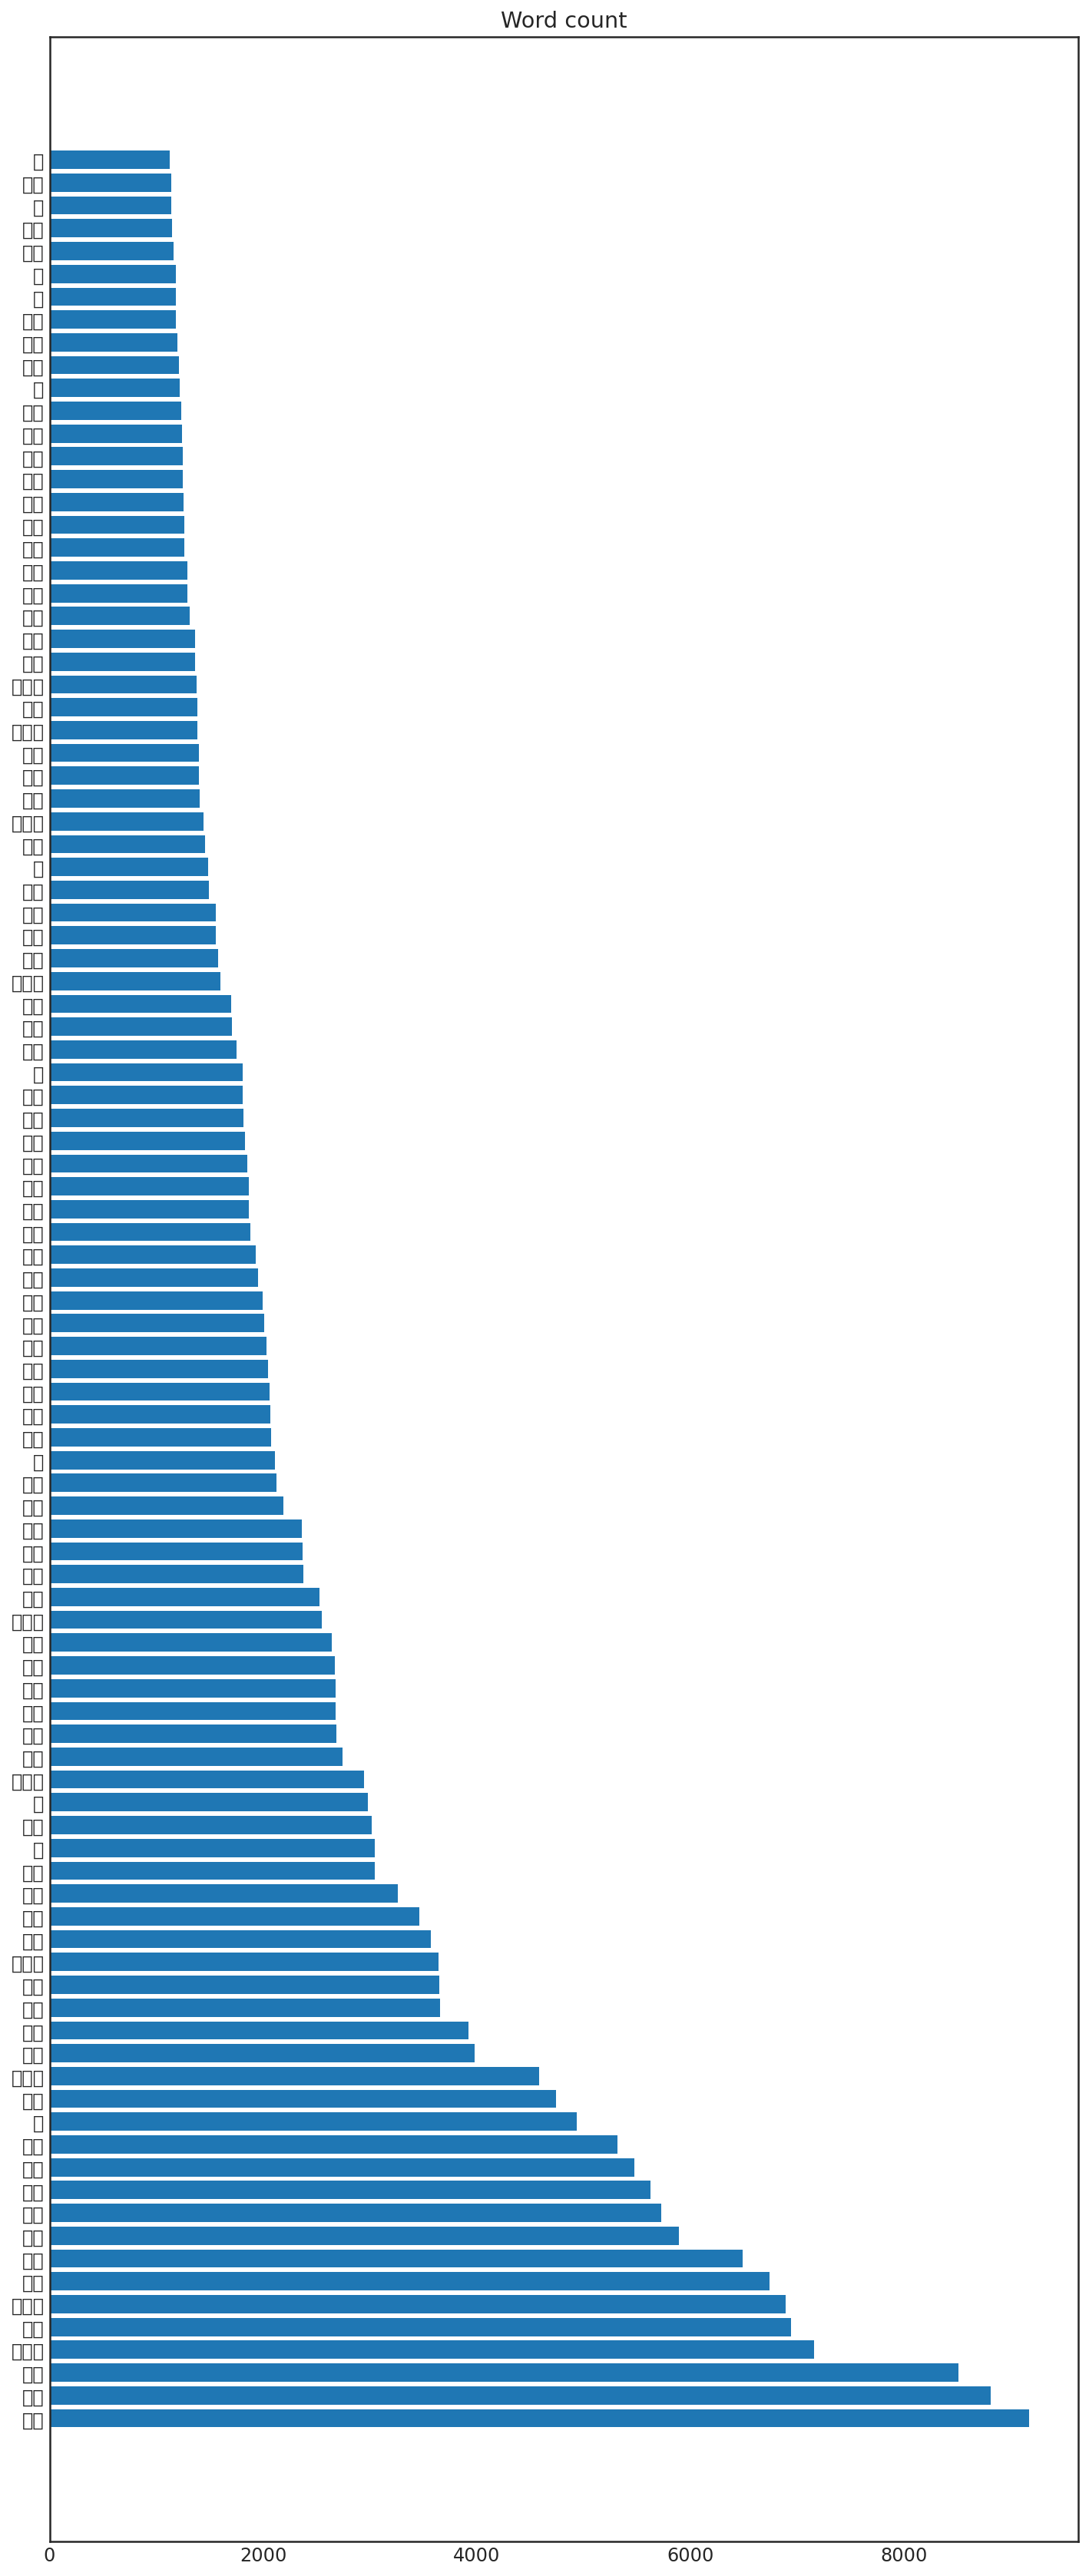

In [11]:
import numpy as np

plt.rcParams['font.size'] = 12

y_pos = np.arange(len(top_reviews_nouns))

plt.figure(figsize=(12,30))
plt.barh(y_pos, top_reviews_nouns.values())
plt.title('Word count')
plt.yticks(y_pos, top_reviews_nouns.keys())
plt.show();

### 트리맵(Treemap) 시각화

* `squarify`는 트리맵 생성을 지원해주는 파이썬 라이브러리
* `squarify` 라이브러리를 이용해 키워드와 키워드 빈도 수를 트리맵으로 나타냄   

In [12]:
!pip install squarify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


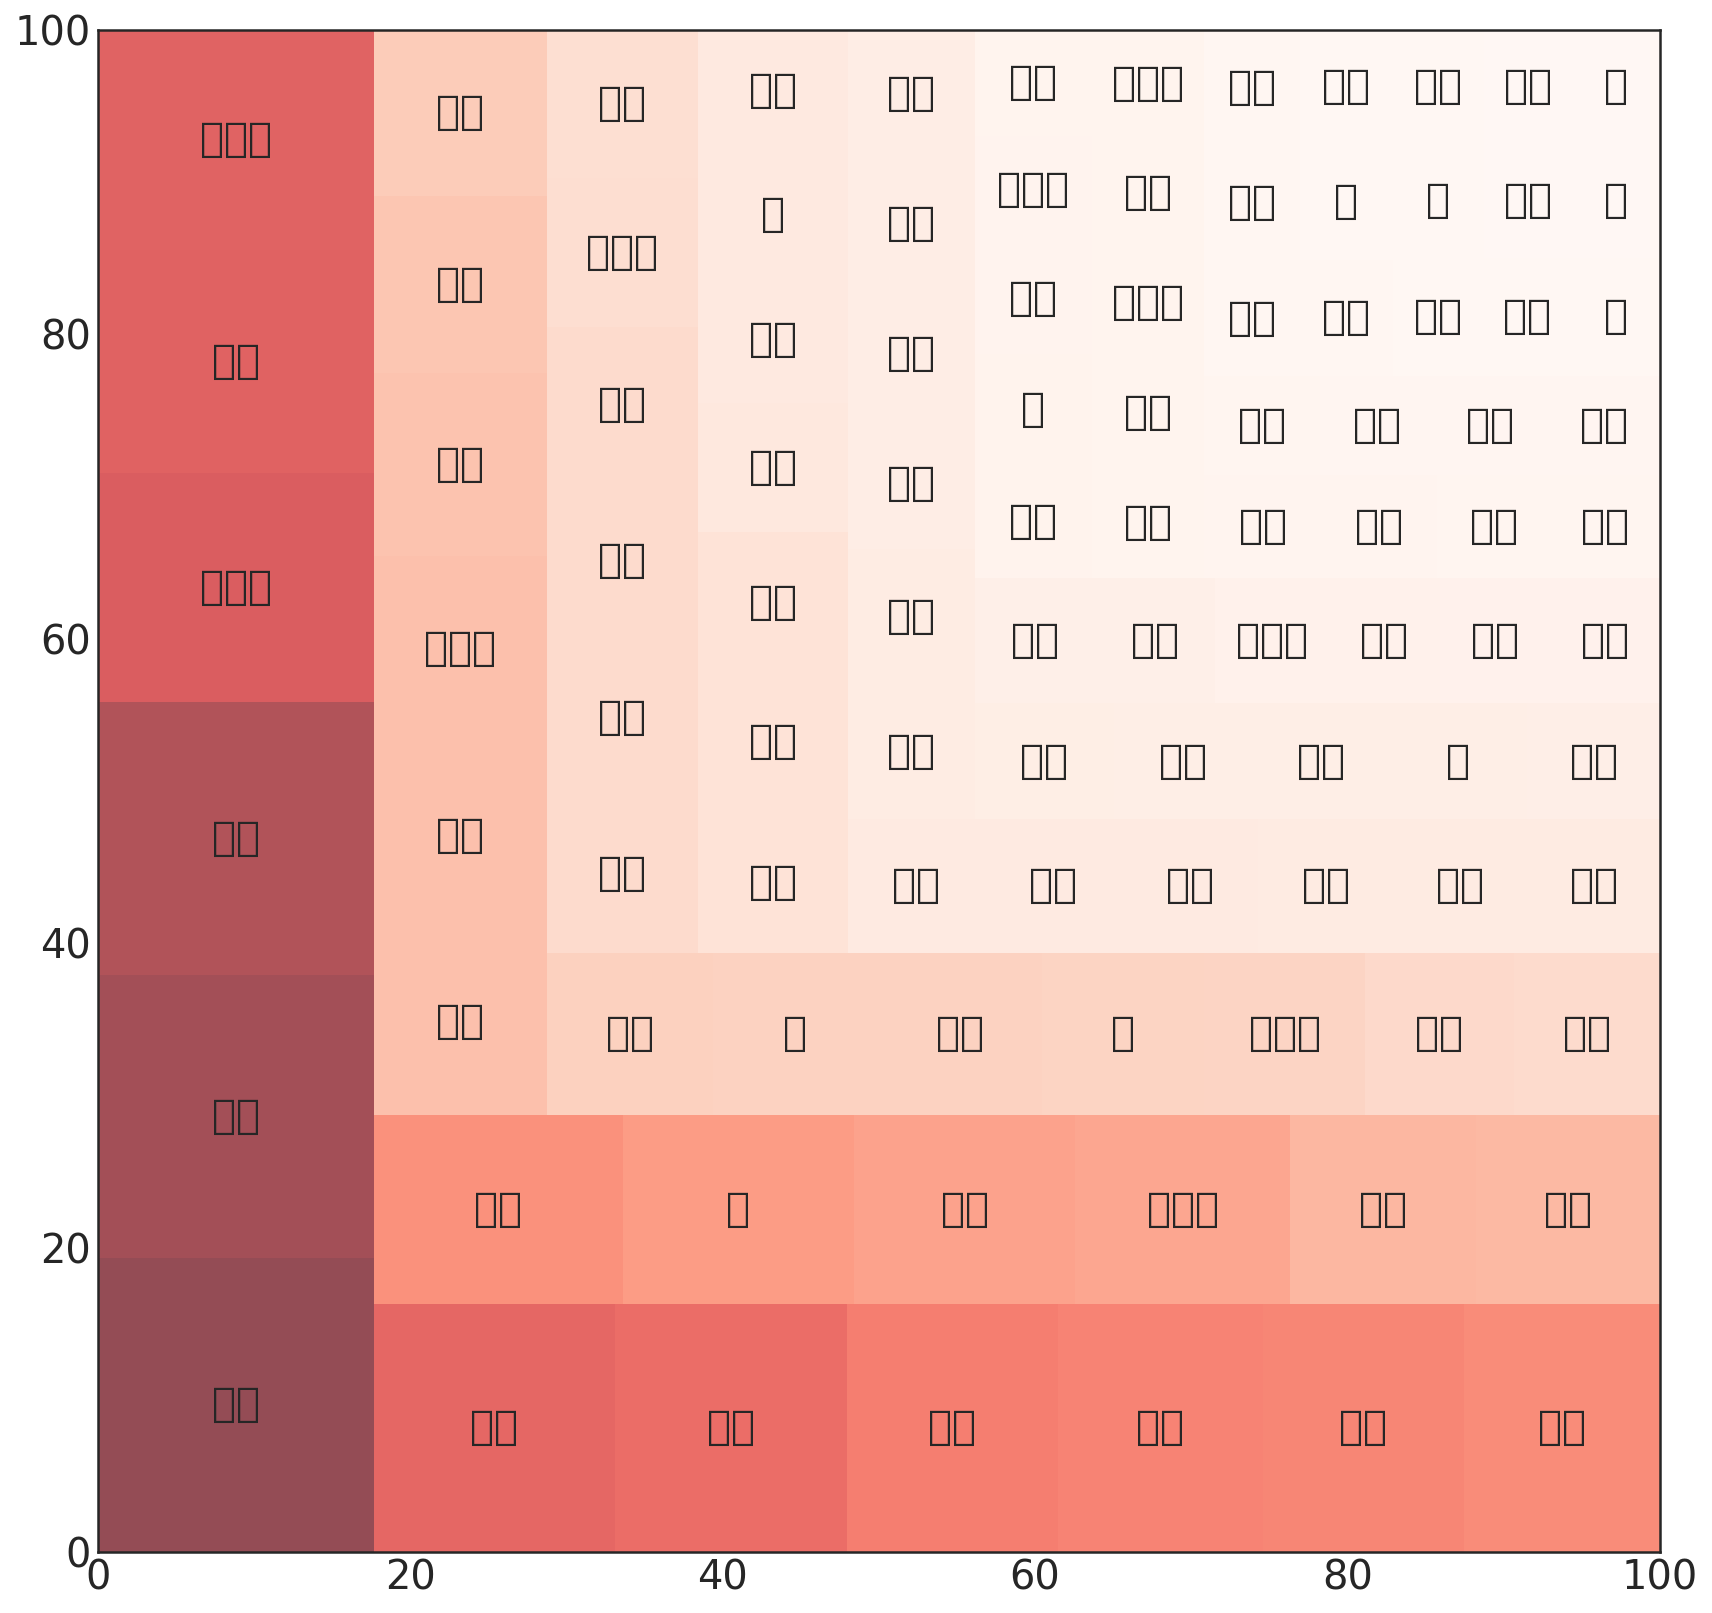

In [13]:
import squarify

plt.rcParams['figure.figsize'] = (14,14)
plt.rcParams['font.size'] = 20

norm = mpl.colors.Normalize(vmin=min(top_reviews_nouns.values()),
                           vmax=max(top_reviews_nouns.values()))
colors = [mpl.cm.Reds(norm(values)) for values in top_reviews_nouns.values()]

squarify.plot(label=top_reviews_nouns.keys(),
              sizes=top_reviews_nouns.values(),
              color=colors,
              alpha=.7);

### 워드클라우드(WordCloud) 시각화

* 텍스트에 담겨있는 여러 형태소들의 등장 빈도를 가장 직관적으로 시각화하는 방법
* 텍스트에 등장하는 단어를 그 등장 빈도에 따라 서로 크기가 다르게 구름 형태로 표현함으로써, 단어의 빈도 수를 한번에 알 수 있음  
* 최근에 많은 서비스들이 어떤 핵심어가 많이 등장했는가를 워드클라우드 형식으로 시각화
* 빈도 수만을 시각적으로 표현한 것이기 때문에, 단어들 사이의 연관성이나 의미 구조 등을 분석하는 데는 한계가 있음

* 파이썬에서 워드 클라우드를 시각화하기 위해 `matplotlib` 라이브러리와 `WordCloud` 라이브러리를 `import` 해서 사용
* `WordCloud` 라이브러리는 `pip install wordcloud` 명령어를 통해 설치 필요

In [14]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


* WordCloud를 이용해 객체를 생성해주고,
`generate_from_frequencies()` 함수로 빈도 수에 따라 워드클라우드 생성

In [15]:
from wordcloud import WordCloud

wc = WordCloud(background_color='white', font_path='./font/NanumBarunGothic.ttf')
wc.generate_from_frequencies(top_reviews_nouns)

* 워드클라우드를 시각화할 때는 이미지 시각화 함수인 `imshow()` 함수를 사용해야 함

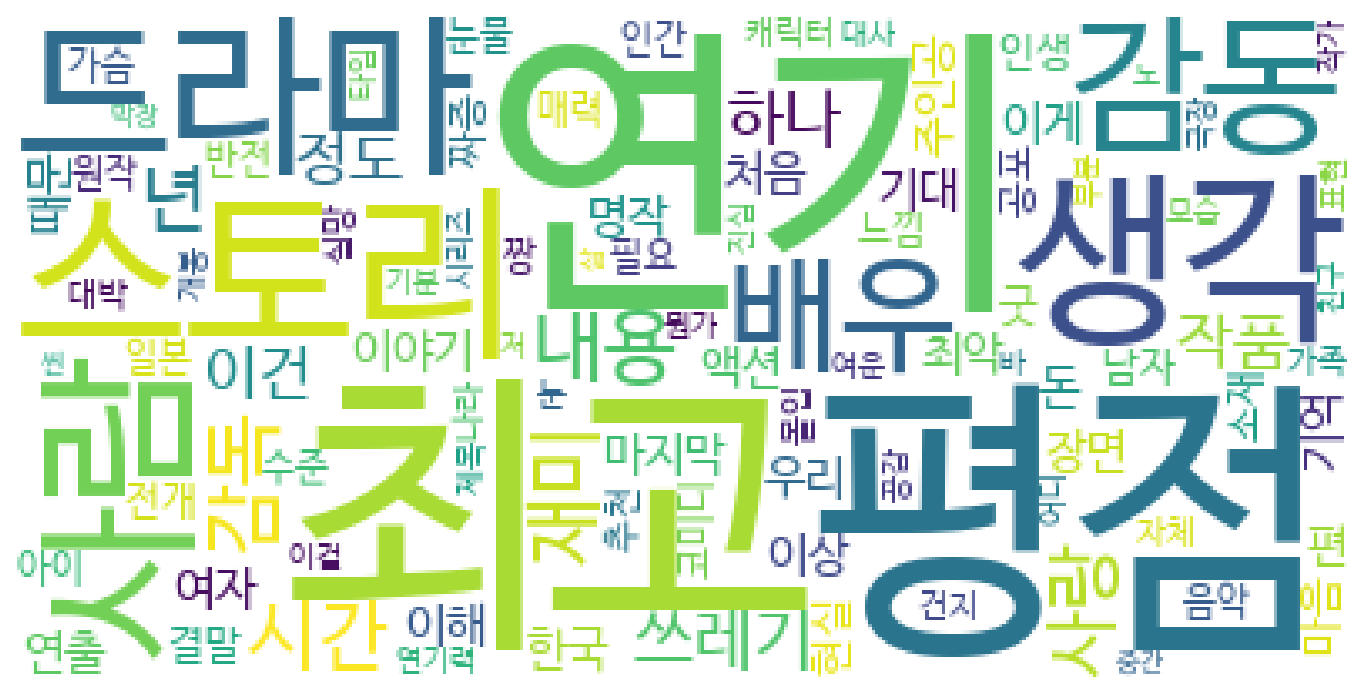

In [16]:
figure = plt.figure(figsize=(12,12))
ax = figure.add_subplot(1,1,1)
ax.axis('off')
ax.imshow(wc);

## 네이버 검색 API 서비스

### 네이버 서비스 API 신청

1. 네이버 개발자센터: https://developers.naver.com/
2. 어플리케이션 등록
3. 클라이언트 ID/SECRET 확인

### NAVER 서비스 API 종류

| 항목 | 주소                                         |
|------|----------------------------------------------|
|블로그| https://openapi.naver.com/v1/search/blog.json |
|뉴스　| https://openapi.naver.com/v1/search/news.json |
| 책　 | https://openapi.naver.com/v1/search/book.json|
| 성인 검색어 판별|　https://openapi.naver.com/v1/search/adult.json|
| 백과사전| https://openapi.naver.com/v1/search/encyc.json|
| 영화| https://openapi.naver.com/v1/search/movie.json|
| 카페글 |https://openapi.naver.com/v1/search/cafearticle.json|
| 지식in| https://openapi.naver.com/v1/search/kin.json|
| 지역 | https://openapi.naver.com/v1/search/local.json|
| 오타변환 | https://openapi.naver.com/v1/search/errata.json|
| 웹문서 | https://openapi.naver.com/v1/search/webkr.json|
| 이미지 | https://openapi.naver.com/v1/search/image.json|
| 쇼핑 | https://openapi.naver.com/v1/search/shop.json|
| 전문자료 | https://openapi.naver.com/v1/search/doc.json|

## 네이버 웹문서 키워드 분석

### 네이버 웹문서 검색 API

In [ ]:
import os
import sys
import urllib.request
import pandas as pd
import json
import re

client_id = 'cCm8B70PvMqKH11EHFPl'
client_secret = 'jjX_Dy9WMT'

query = urllib.parse.quote(input("검색 질의: "))
idx = 0
display = 100
start = 1
end = 1000

web_df = pd.DataFrame(columns=('Title', 'Link', 'Description'))

for start_index in range(start, end, display):
    url = "https://openapi.naver.com/v1/search/webkr?query=" + query \
    + '&display=' + str(display) + '&start=' + str(start_index)

    request = urllib.request.Request(url)
    request.add_header('X-Naver-Client-Id', client_id)
    request.add_header('X-Naver-Client-Secret', client_secret)
    response = urllib.request.urlopen(request)
    rescode = response.getcode()

    if(rescode == 200):
        response_body = response.read()
        response_dict = json.loads(response_body.decode('utf-8'))
        items = response_dict['items']
        for item_index in range(0, len(items)):
            remove_tag = re.compile('<.*?>')
            title = re.sub(remove_tag, '', items[item_index]['title'])
            link = items[item_index]['link']
            description = re.sub(remove_tag, '', items[item_index]['description'])
            web_df.loc[idx] = [title, link, description]
            idx += 1
    else:
        print("Error Code: " + rescode)

web_df

In [ ]:
web = []
for d in web_df.Description:
    web.append(d)

print(web[:5])

### 형태소 분석을 이용한 명사 추출


#### 불용어 사전

불용어 예제: `인공지능 인공 지능 분야 수 것 등 기반 일 년 말 문 월 이 명 깨 개 중 범 부 딥 빅 책 분 봉 차 나 내 전 억 대 형 선 사 폼 원 번`

In [ ]:
stop_words = '인공지능 인공 지능 분야 수 것 등 기반 일 년 말 문 월 이 명 깨 개 중 범 부 딥 빅 책 분 봉 차 나 내 전 억 대 형 선 사 폼 원 번'
stop_words = stop_words.split(' ')
print(stop_words)

In [ ]:
tagger = Mecab()
web_nouns = []
for w in web:
    for noun in tagger.nouns(w):
        if noun not in stop_words:
            web_nouns.append(noun)

web_nouns[:10]

### 단어 빈도수 측정

In [ ]:
web_nouns_counter = Counter(web_nouns)
top_web_nouns = dict(web_nouns_counter.most_common(100))
top_web_nouns

### 단어 빈도 시각화

In [ ]:
plt.rcParams['font.size'] = 12

y_pos = np.arange(len(top_web_nouns))

plt.figure(figsize=(12,24))
plt.barh(y_pos, top_web_nouns.values())
plt.title('Word Count')
plt.yticks(y_pos,top_web_nouns.keys())
plt.show();

### 트리맵 시각화

In [ ]:
plt.rcParams['figure.figsize'] = (14, 14)
plt.rcParams['font.size'] = 20

norm = mpl.colors.Normalize(vmin=min(top_web_nouns.values()),
                            vmax=max(top_web_nouns.values()))
colors = [mpl.cm.Reds(norm(value)) for value in top_web_nouns.values()]

squarify.plot(label=top_web_nouns.keys(),
              sizes=top_web_nouns.values(),
              color=colors,
              alpha=.7);

### 워드클라우드 시각화

In [ ]:
wc = WordCloud(background_color='white', font_path='./font/NanumBarunGothic.ttf')
wc.generate_from_frequencies(top_web_nouns)

figure = plt.figure(figsize=(14,14))
ax=figure.add_subplot(1,1,1)
ax.imshow(wc)
plt.show()

## 네이버 뉴스 키워드 분석

### 네이버 뉴스 검색 API

In [ ]:
import os
import sys
import urllib.request
import pandas as pd
import json
import re

client_id = 'cCm8B70PvMqKH11EHFPl'
client_secret = 'jjX_Dy9WMT'

query = urllib.parse.quote(input("검색 질의: "))
idx = 0
display = 100
start = 1
end = 1000
sort = 'sim'

news_df = pd.DataFrame(columns=('Title', 'OriginalLink', 'Link', 'Description','Publication Date'))

for start_index in range(start, end, display):
    url = "https://openapi.naver.com/v1/search/news?query=" + query \
    + '&display=' + str(display) + '&start=' + str(start_index) + '&sort=' + sort

    request = urllib.request.Request(url)
    request.add_header('X-Naver-Client-Id', client_id)
    request.add_header('X-Naver-Client-Secret', client_secret)
    response = urllib.request.urlopen(request)
    rescode = response.getcode()

    if(rescode == 200):
        response_body = response.read()
        response_dict = json.loads(response_body.decode('utf-8'))
        items = response_dict['items']
        for item_index in range(0, len(items)):
            remove_tag = re.compile('<.*?>')
            title = re.sub(remove_tag, '', items[item_index]['title'])
            original_link = items[item_index]['originallink']
            link = items[item_index]['link']
            description = re.sub(remove_tag, '', items[item_index]['description'])
            pub_date = items[item_index]['pubDate']
            news_df.loc[idx] = [title, original_link, link, description, pub_date]
            idx += 1
    else:
        print("Error Code: " + rescode)

news_df

In [ ]:
news = []
for n in news_df.Title:
    news.append(n)
    
print(news[:5])

### 형태소 분석을 이용한 명사 추출


In [ ]:
tagger = Mecab()
news_nouns = []
for n in news:
    for noun in tagger.nouns(n):
        if noun not in stop_words:
            news_nouns.append(noun)

news_nouns[:10]

### 단어 빈도수 측정

In [ ]:
news_nouns_counter = Counter(news_nouns)
top_news_nouns = dict(news_nouns_counter.most_common(100))
print(top_news_nouns)

### 단어 빈도 시각화

In [ ]:
plt.rcParams['font.size'] = 12

y_pos = np.arange(len(top_news_nouns))

plt.figure(figsize=(12,24))
plt.barh(y_pos, top_news_nouns.values())
plt.title('Word Count')
plt.yticks(y_pos,top_news_nouns.keys())
plt.show()

### 트리맵 시각화

In [ ]:
import squarify

plt.rcParams['figure.figsize'] = (14,14)
plt.rcParams['font.size'] = 20

norm = mpl.colors.Normalize(vmin=min(top_news_nouns.values()),
                           vmax=max(top_news_nouns.values()))
colors = [mpl.cm.Reds(norm(values)) for values in top_reviews_nouns.values()]

squarify.plot(label=top_news_nouns.keys(),
              sizes=top_news_nouns.values(),
              color=colors,
              alpha=.7);

### 워드클라우드 시각화

In [ ]:
wc = WordCloud(background_color='white', font_path='./font/NanumBarunGothic.ttf')
wc.generate_from_frequencies(top_news_nouns)

figure = plt.figure(figsize=(14,14))
ax=figure.add_subplot(1,1,1)
ax.imshow(wc)
plt.show()

## 네이버 블로그 키워드 분석

### 네이버 블로그 검색 API

In [ ]:
import os
import sys
import urllib.request
import pandas as pd
import json
import re

client_id = 'cCm8B70PvMqKH11EHFPl'
client_secret = 'jjX_Dy9WMT'

query = urllib.parse.quote(input("검색 질의: "))
idx = 0
display = 100
start = 1
end = 1000
sort = 'sim'

blog_df = pd.DataFrame(columns=('Title', 'Link', 'Description','Blogger Name', 'Blogger Link'))

for start_index in range(start, end, display):
    url = "https://openapi.naver.com/v1/search/blog?query=" + query \
    + '&display=' + str(display) + '&start=' + str(start_index) + '&sort=' + sort

    request = urllib.request.Request(url)
    request.add_header('X-Naver-Client-Id', client_id)
    request.add_header('X-Naver-Client-Secret', client_secret)
    response = urllib.request.urlopen(request)
    rescode = response.getcode()

    if(rescode == 200):
        response_body = response.read()
        response_dict = json.loads(response_body.decode('utf-8'))
        items = response_dict['items']
        for item_index in range(0, len(items)):
            remove_tag = re.compile('<.*?>')
            title = re.sub(remove_tag, '', items[item_index]['title'])
            link = items[item_index]['link']
            description = re.sub(remove_tag, '', items[item_index]['description'])
            blogger_name = items[item_index]['bloggername']
            blogger_link = items[item_index]['bloggerlink']

            blog_df.loc[idx] = [title, link, description, blogger_name, blogger_link]
            idx += 1
    else:
        print("Error Code: " + rescode)

blog_df

In [ ]:
blog = []
for b in blog_df.Description:
    blog.append(b)

for b in blog_df.Title:
    blog.append(b)

print(blog[:5])

### 형태소 분석을 이용한 명사 추출


In [ ]:
tagger = Mecab()
blog_nouns = []
for b in blog:
    for noun in tagger.nouns(b):
        if noun not in stop_words:
            blog_nouns.append(noun)

blog_nouns[:10]

### 단어 빈도수 측정

In [ ]:
blog_nouns_counter = Counter(blog_nouns)
top_blog_nouns = dict(blog_nouns_counter.most_common(100))
top_blog_nouns

### 단어 빈도 시각화

In [ ]:
plt.rcParams['font.size'] = 12

y_pos = np.arange(len(top_blog_nouns))

plt.figure(figsize=(12,24))
plt.barh(y_pos, top_blog_nouns.values())
plt.title('Word Count')
plt.yticks(y_pos,top_blog_nouns.keys())
plt.show()

### 트리맵 시각화

In [ ]:
import squarify

plt.rcParams['figure.figsize'] = (14,14)
plt.rcParams['font.size'] = 20

norm = mpl.colors.Normalize(vmin=min(top_blog_nouns.values()),
                           vmax=max(top_blog_nouns.values()))
colors = [mpl.cm.Reds(norm(values)) for values in top_blog_nouns.values()]

squarify.plot(label=top_blog_nouns.keys(),
              sizes=top_blog_nouns.values(),
              color=colors,
              alpha=.7);

### 워드클라우드 시각화

In [ ]:
wc = WordCloud(background_color='white', font_path='./font/NanumBarunGothic.ttf')
wc.generate_from_frequencies(top_blog_nouns)

figure = plt.figure(figsize=(14,14))
ax=figure.add_subplot(1,1,1)
ax.imshow(wc)
plt.show()